<a href="https://colab.research.google.com/github/JayBabon/DSP/blob/main/audio_recognition_project/audio_recognition/clean_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import numpy as np
import soundfile as sf

# Load the audio file
audio, sample_rate = librosa.load('thevoiceECE1.m4a', sr=44100)

# Find the index of the first positive sample
first_positive_index = np.where(audio > 0)[0]

# Check if there's a positive sample
if first_positive_index.size > 0:
    # Crop the audio from the first positive sample to 44100 samples
    start_index = first_positive_index[0]
    cropped_audio = audio[start_index:start_index + 44100]

    # Ensure we don't exceed the array length
    if len(cropped_audio) < 44100:
        print("Not enough samples to crop to 44100.")
    else:
        # Write the cropped audio to a new file
        sf.write('thevoiceECE100.wav', cropped_audio, sample_rate, subtype='PCM_24')
else:
    print("No positive samples found in the audio.")

<ipython-input-1-ef37ba8be989>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load('thevoiceECE1.m4a', sr=44100)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'thevoiceECE1.m4a'

In [ ]:
import librosa

# Load the audio file
audio, sample_rate = librosa.load('Clean_ECE1.wav', sr=44100)

# Get the number of samples
num_samples = len(audio)

print(f"Number of samples: {num_samples}")

Number of samples: 44100


In [ ]:
!git clone https://github.com/AllenDowney/ThinkDSP.git

Cloning into 'ThinkDSP'...
remote: Enumerating objects: 2636, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 2636 (delta 77), reused 142 (delta 64), pack-reused 2469 (from 1)
Receiving objects: 100% (2636/2636), 235.54 MiB | 15.58 MiB/s, done.
Resolving deltas: 100% (1430/1430), done.


In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2024-11-05 05:45:00--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2024-11-05 05:45:00--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48554 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.42K  --.-KB/s    in 0.04s   

2024-11-05 05:45:00 (1.21 MB/s) - ‘thinkdsp.py’ saved [48554/48554]



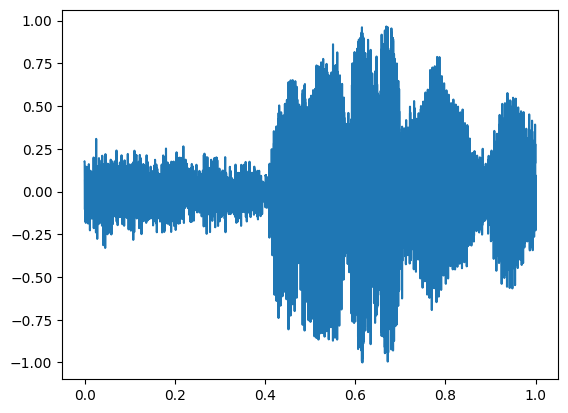

In [ ]:
from thinkdsp import read_wave

myVoice = read_wave ('Clean_ECE12.wav')

myVoice.plot()

In [ ]:
pip install librosa

In [ ]:
import os

# Specify the directory where your files are located
directory = '/content/'  # Update this path to the correct folder

# Loop through file numbers 1 to 100 and delete the corresponding .wav files
for i in range(1, 101):
    file_name = f'ece {i}.wav'  # Construct the file name
    file_path = os.path.join(directory, file_name)  # Construct the full path to the file

    # Check if the file exists
    if os.path.exists(file_path):
        os.remove(file_path)  # Remove the file
        print(f'Deleted: {file_path}')
    else:
        print(f'File not found: {file_path}')


Deleted: /content/ece 1.wav
Deleted: /content/ece 2.wav
Deleted: /content/ece 3.wav
Deleted: /content/ece 4.wav
Deleted: /content/ece 5.wav
Deleted: /content/ece 6.wav
Deleted: /content/ece 7.wav
Deleted: /content/ece 8.wav
Deleted: /content/ece 9.wav
Deleted: /content/ece 10.wav
Deleted: /content/ece 11.wav
Deleted: /content/ece 12.wav
Deleted: /content/ece 13.wav
Deleted: /content/ece 14.wav
Deleted: /content/ece 15.wav
Deleted: /content/ece 16.wav
Deleted: /content/ece 17.wav
Deleted: /content/ece 18.wav
Deleted: /content/ece 19.wav
Deleted: /content/ece 20.wav
Deleted: /content/ece 21.wav
Deleted: /content/ece 22.wav
Deleted: /content/ece 23.wav
Deleted: /content/ece 24.wav
Deleted: /content/ece 25.wav
Deleted: /content/ece 26.wav
Deleted: /content/ece 27.wav
Deleted: /content/ece 28.wav
Deleted: /content/ece 29.wav
Deleted: /content/ece 30.wav
Deleted: /content/ece 31.wav
Deleted: /content/ece 32.wav
Deleted: /content/ece 33.wav
Deleted: /content/ece 34.wav
Deleted: /content/ece 3

In [ ]:
import librosa
import numpy as np

def extract_mfcc_coefficients(audio_path, total_coeffs=1300, n_mfcc=13):
    """
    Extracts the first 'total_coeffs' MFCC coefficients from an audio file.
    """
    y, sr = librosa.load(audio_path, sr=None)

    # Compute MFCCs with 13 coefficients per frame
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Flatten to get a single-dimensional array and take the first 1300 coefficients
    mfcc_flat = mfcc.T.flatten()[:total_coeffs]

    # If the flattened array has less than 1300 coefficients, pad with zeros
    if len(mfcc_flat) < total_coeffs:
        mfcc_flat = np.pad(mfcc_flat, (0, total_coeffs - len(mfcc_flat)), mode='constant')

    return mfcc_flat

def generate_mfcc_matrix(num_files=100, total_coeffs=1300, file_prefix="ECE"):
    """
    Loops through audio files named clean_ECE1.wav to clean_ECE100.wav,
    extracts MFCCs, and generates a matrix with shape (100, 1300).
    """
    mfcc_matrix = np.zeros((num_files, total_coeffs))

    for i in range(1, num_files + 1):
        audio_path = f"{file_prefix} {i} ({i}).wav"  # Generates names "clean_ECE1.wav", "clean_ECE2.wav", ..., "clean_ECE100.wav"
        try:
            # Extract the first 1300 MFCC coefficients for each file
            mfcc_coeffs = extract_mfcc_coefficients(audio_path, total_coeffs=total_coeffs)
            mfcc_matrix[i - 1, :] = mfcc_coeffs
        except Exception as e:
            print(f"Could not process file {audio_path}: {e}")

    return mfcc_matrix

def save_matrix_to_csv(matrix, output_path="final_mfcc_matrix.csv"):
    """
    Saves the MFCC matrix to a CSV file.
    """
    np.savetxt(output_path, matrix, delimiter=',')
    print(f"Final MFCC matrix saved to {output_path}")

def main():
    # Generate the MFCC matrix from 100 audio files
    mfcc_matrix = generate_mfcc_matrix()

    # Check matrix shape for confirmation
    print("Final MFCC Matrix Shape: ", mfcc_matrix.shape)  # Should be (100, 1300)

    # Save the matrix to a CSV file
    save_matrix_to_csv(mfcc_matrix)

if __name__ == "__main__":
    main()

Final MFCC Matrix Shape:  (100, 1300)
Final MFCC matrix saved to final_mfcc_matrix.csv
